In [256]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import collections

In [257]:
energy_df = pd.read_csv("all_energy_statistics.csv")
energy_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [258]:
# identify the types of objects in the data frame
energy_df.info()

# data is missing from the quantity footnotes column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
country_or_area          1189482 non-null object
commodity_transaction    1189482 non-null object
year                     1189482 non-null int64
unit                     1189482 non-null object
quantity                 1189482 non-null float64
quantity_footnotes       163946 non-null float64
category                 1189482 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [259]:
# find number of unique values in each column
print(f"Number of Unique Countries {energy_df.country_or_area.nunique()}")
print(f"Number of Unique Products {energy_df.category.nunique()}")
print(f"Number of Unique Transactions {energy_df.commodity_transaction.nunique()}")
print(f"Different Units of Measure {energy_df.unit.nunique()}")
print(f"Different FootNote Values {energy_df.quantity_footnotes.nunique()}")

Number of Unique Countries 243
Number of Unique Products 71
Number of Unique Transactions 2452
Different Units of Measure 6
Different FootNote Values 1


# Find total quantity of product involved in energy

In [260]:
total_energy = energy_df.groupby(['category', 'unit']).mean().round(2).drop(['year', 'quantity_footnotes'], axis=1)
total_energy.head()

,,quantity
category,unit,
additives_and_oxygenates,"Metric tons, thousand",355.34
animal_waste,Terajoules,50930.30
anthracite,"Metric tons, thousand",534.20
aviation_gasoline,"Metric tons, thousand",18.19
bagasse,"Metric tons, thousand",3815.99


In [261]:
# reset index to plot quantity against products
total_energy = product_flow.reset_index()

In [262]:
total_energy = total_energy.sort_values(by=['quantity'], ascending=False)
total_energy.head()

,index,products,unit,quantity
0,11,brown_coal,"Metric tons, thousand",1967868.84
1,30,hard_coal,"Metric tons, thousand",1694778.49
2,41,natural_gas_including_lng,Terajoules,1343446.28
3,57,peat,"Metric tons, thousand",736122.47
4,17,conventional_crude_oil,"Metric tons, thousand",253327.06


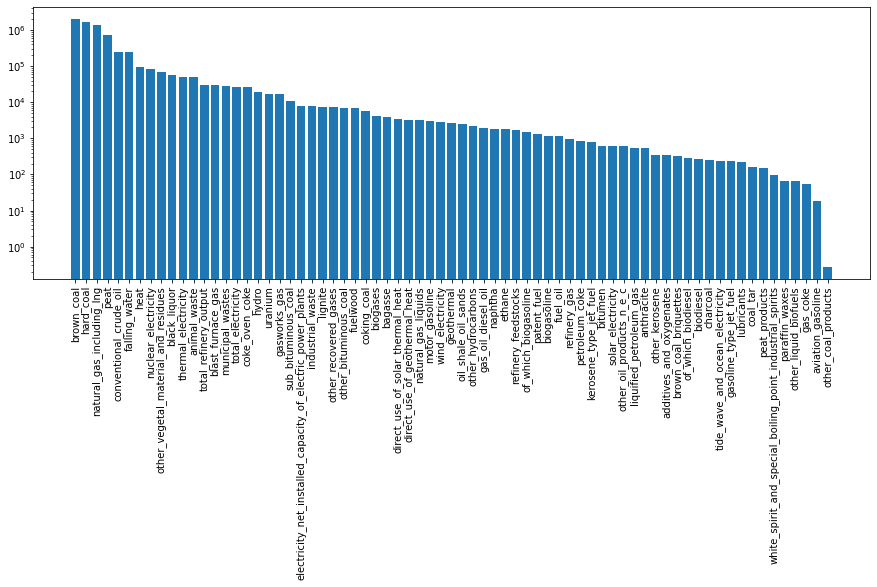

In [263]:
plt.figure(figsize=(15,5))

plt.bar(total_energy['products'], total_energy['quantity'])
plt.xticks(rotation=90)
plt.yscale('log')

plt.show()

# The graph above shows how much of each product has been produced, transformed, exported, imported, and/or consumed from 1990 to 2014 in any country. This is very general and does not provide much information.

<h2>Need to break down this data into sections
       <br>
       <br>*Products_Class
       <br>*Consumption
       <br>*Transformation Processes</h2>


# Product Classes

In [264]:
# Drop FootNote Column
energy_df = energy_df.drop(['quantity_footnotes'], axis=1)

# Rename category column to product and add empty column named product class
energy_df = energy_df.rename(columns={"category":"product"})
energy_df["product_class"] = ''

In [265]:
energy_df.head()

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates,
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates,
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates,
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates,
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates,


In [229]:
def product_categories():
    for label,content in energy_df.items():
        print('label: ' + label)
        print('content: ' + content)

# energy_df['product_category'] = energy_df.apply(product_categories, axis=1)
        
    

In [266]:
Oil_Class = ['additives_and_oxygenates', 'paraffin_waxes', 'conventional_crude_oil', 'natural_gas_liquids','other_hydrocarbons','aviation_gasoline','motor_gasoline','biogasoline','gasoline_type_jet_fuel','kerosene_type_jet_fuel','other_kerosene','gas_oil_diesel_oil','biodiesel','fuel_oil','liquified_petroleum_gas','refinery_feedstocks','naphtha','white_spirit_and_special_boiling_point_industrial_spirits','lubricants','bitumen','paraffin_waxes','petroleum_coke','refinery_gas','ethane','other_oil_products_n_e_c']

# energy_df['product'].isin(Oil_Class)
    
# for product in energy_df['product']:
#     if energy_df['product'].isin(Oil_Class) is True:
#         print(energy_df['product'])

# for product in energy_df['product']:
#     if product == "paraffin_waxes":
#         print("Oil Product")

In [278]:
energy_df.loc[energy_df["product"] == "natural_gas_including_lng"]

,country_or_area,commodity_transaction,year,unit,quantity,product,product_class
782190,Albania,Natural gas (including LNG) - consumption by c...,1996,Terajoules,323.0,natural_gas_including_lng,
782191,Albania,Natural gas (including LNG) - consumption by c...,1995,Terajoules,389.0,natural_gas_including_lng,
782192,Albania,Natural gas (including LNG) - consumption by c...,1994,Terajoules,450.0,natural_gas_including_lng,
782193,Albania,Natural gas (including LNG) - consumption by c...,1993,Terajoules,500.0,natural_gas_including_lng,
782194,Albania,Natural gas (including LNG) - consumption by c...,1992,Terajoules,600.0,natural_gas_including_lng,
...,...,...,...,...,...,...,...
846346,Turkey,Natural gas (including LNG) - Vented,1994,Terajoules,957.0,natural_gas_including_lng,
846347,Turkey,Natural gas (including LNG) - Vented,1993,Terajoules,536.0,natural_gas_including_lng,
846348,Turkey,Natural gas (including LNG) - Vented,1992,Terajoules,38.0,natural_gas_including_lng,
846349,Turkey,Natural gas (including LNG) - Vented,1991,Terajoules,38.0,natural_gas_including_lng,


In [268]:
energy_dict = energy_df.to_dict()

In [269]:
energy_dict['product'][0]

'additives_and_oxygenates'

In [271]:
for product in energy_dict['product']:
    for products in Oil_Class:
        if energy_dict['product'][product] == products:
            energy_dict['product_class'][product] = 'Oil'

In [282]:
energy_dict['product_class'][782191]

''